In [1]:
# Imports for testing and plotting
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.signal as signal

In [13]:
import numpy as np
from scipy.special import binom


def thiran(N, delta):
    """
    Returns b, a coefficients for Thiran allpass
    
    Algorithm from https://ccrma.stanford.edu/~jos/pasp/Thiran_Allpass_Interpolators.html
    """
    
    def coeff(N, k, delta):
        factors = [(delta-N+nn)/float(delta-N+k+nn)
                       for nn in np.arange(N+1)]
        return ((-1)**k)*binom(N,k)*np.prod(factors)

    coeffs = np.array([coeff(N, kk, delta) for kk in range(0, N+1)])
    coeffs[0] = 1.
    b, a = coeffs[::-1].copy(), coeffs.copy()
    return b, a

In [14]:
b, a = thiran(8, 7.75)
sos = signal.tf2sos(b, a)

In [4]:
w, h = signal.freqz(b, a, worN = 16384, fs = 16384)

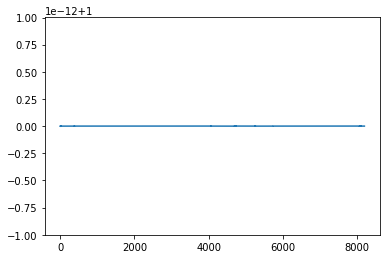

In [8]:
plt.plot(w, abs(h))

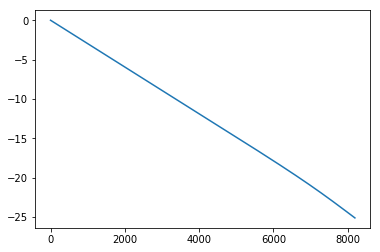

In [7]:
plt.plot(w, np.unwrap(np.angle(h)))

In [11]:
imp = np.zeros(30)
imp[10] = 1.
test = signal.sosfilt(sos, imp)

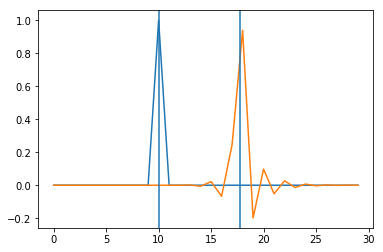

In [12]:
plt.plot(imp)
plt.plot(test)
plt.axvline(10)
plt.axvline(10+7.75)